# Laboratorul 10

Rezolvați exercițiile din îndrumarul PDF. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import dictlearn
from dictlearn import DictionaryLearning
from dictlearn import methods
from matplotlib import image
from sklearn.feature_extraction.image \
import extract_patches_2d, reconstruct_from_patches_2d
from sklearn.preprocessing import normalize


In [47]:
p = 8           # dimensiunea unui patch (numar de pixeli)
s = 6           # sparsitatea
N = 1000        # numarul total de patch-uri
n = 256         # numarul de atomi din dictionar
K = 50          # numarul de iteratii DL
sigma = 0.075   # deviatia standard a zgomotului

# Exercitiul 1

## a)

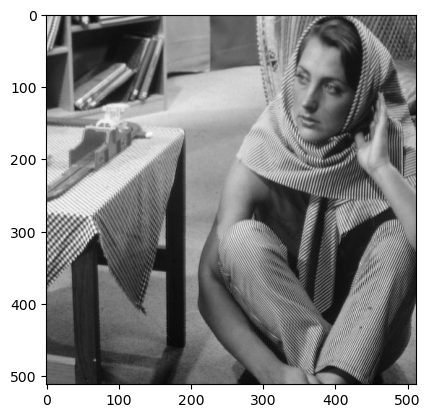

In [48]:
I=image.imread('assets/barbara.png')
if I.dtype != 'float32':
    I = I / 255.0
    
plt.imshow(I,cmap='gray')

## b)

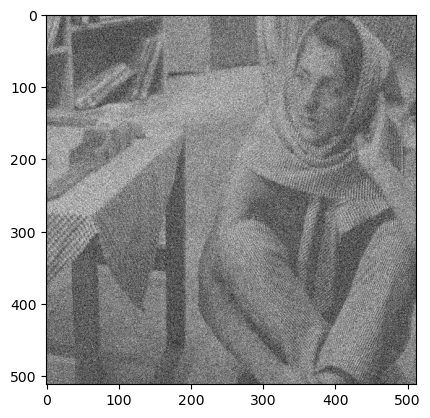

In [49]:
sigma = 0.21
Inoisy = I + sigma * np.random.randn(I.shape[0], I.shape[1])
plt.imshow(Inoisy,cmap='gray')

## c)

In [50]:
p = 6
Ynoisy = extract_patches_2d(Inoisy, (p, p))
print("Dimensiunea initiala:", Ynoisy.shape)

Ynoisy = Ynoisy.reshape(Ynoisy.shape[0], -1)
print("Dimensiunea dupa vectorizare:", Ynoisy.shape)

Ynoisy = np.transpose(Ynoisy)
media_semnale = np.mean(Ynoisy, axis=0)
Ynoisy = Ynoisy - media_semnale

Dimensiunea initiala: (257049, 6, 6)
Dimensiunea dupa vectorizare: (257049, 36)


## d)

In [51]:
N = 1250
indices = np.random.choice(Ynoisy.shape[1], N, replace=False)
Y = Ynoisy[:, indices]

# Exercitiul 2

## a)

In [52]:
n = 256
D0 = np.random.randn(p * p, n)
D0 = normalize(D0, axis=0, norm='max')

## b)

In [53]:
dl = DictionaryLearning(
n_components=n,
max_iter=K,
fit_algorithm='ksvd',
n_nonzero_coefs=s,
code_init=None,
dict_init=D0,
params=None,
data_sklearn_compat=False
)
dl.fit(Y)
D = dl.D_


# Exercitiul 3

## a)

In [54]:
Xc, err = methods.omp(Ynoisy, D, n_nonzero_coefs=s)
print(f"Dimensiune Xc: {Xc.shape}")
print(f"Eroare de reconstructie: {err}")

Dimensiune Xc: (256, 257049)
Eroare de reconstructie: 0.0990673720453263


## b)

In [55]:
Yc = D @ Xc
Yc += media_semnale
print("Yc:", Yc)
print("Yc shape:", Yc.shape)

Yc: [[0.64084399 1.19079224 0.55687977 ... 0.58115177 0.60692302 0.27243616]
 [1.23825936 0.49661944 0.88531461 ... 0.60532737 0.34839904 0.42311496]
 [0.59322263 1.07642747 0.88834498 ... 0.51388839 0.40745923 0.47471383]
 ...
 [0.73659284 0.46927656 0.65459596 ... 0.5093339  0.13579678 0.3721812 ]
 [0.38619631 0.67138125 0.75298713 ... 0.15758189 0.42505387 0.21781768]
 [0.62409447 0.53746353 0.90191431 ... 0.37807173 0.31969742 0.59398983]]
Yc shape: (36, 257049)


## c)

In [56]:
Yc = np.transpose(Yc)
Yc = Yc.reshape(-1, p, p)

## d)

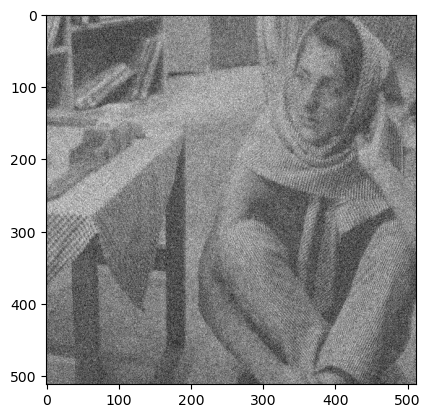

In [57]:
Ic = reconstruct_from_patches_2d(Yc, I.shape)
plt.imshow(Ic, cmap='gray')

# Exercitiul 4

## a)

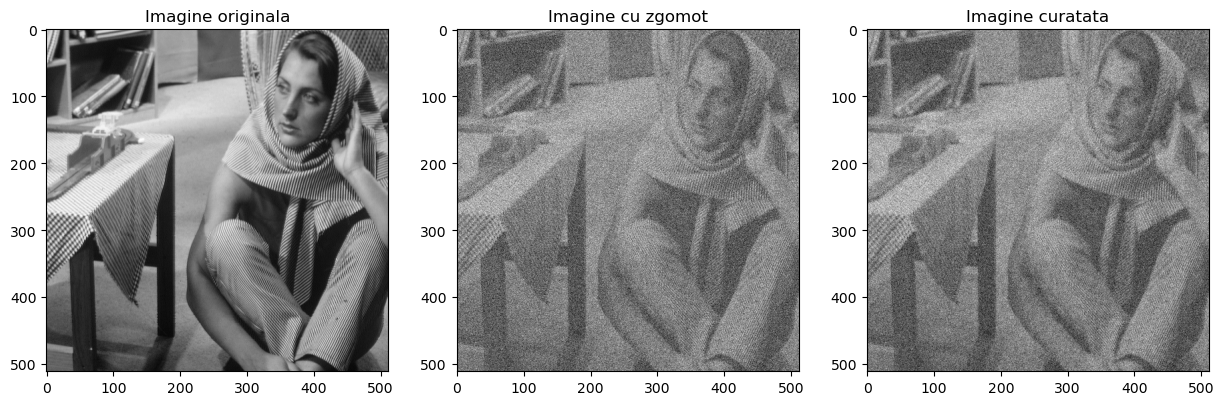

In [58]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(I, cmap='gray')
plt.title("Imagine originala")

plt.subplot(1, 3, 2)
plt.imshow(Inoisy, cmap='gray')
plt.title("Imagine cu zgomot")

plt.subplot(1, 3, 3)
plt.imshow(Ic, cmap='gray')
plt.title("Imagine curatata")
plt.show()

## b)

In [63]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

psnr_noisy = psnr(I, Inoisy)
psnr_cleaned = psnr(I, Ic)
print(f"PSNR (noisy vs original): {psnr_noisy:.2f}")
print(f"PSNR (denoised vs original): {psnr_cleaned:.2f}")

PSNR (noisy vs original): 13.54
PSNR (denoised vs original): 15.39


## c)

In [62]:
print(f"PSNR Noisy: {psnr_noisy:.2f}")
print(f"PSNR Denoised: {psnr_cleaned:.2f}")

if psnr_cleaned > psnr_noisy:
    print("Izi punct bonus: Metoda a functionat corect!")

PSNR Noisy: 13.54
PSNR Denoised: 15.39
Izi punct bonus: Metoda a functionat corect!
